# Midterm Part II: (50 pts)

### Instruction
- "Closed-book" exam, no Google or internet search is allowed. 
- The only allowed material is reference sheet created, which is under the same folder.
- Please follow below questions and instructions to complete this part of the exam. In some questions, please write and execute Python code for data analysis in Cell mode. Comment your code to explain each step. And use `Shift+Enter` to excute your code.
- Some questions need text discussion. Please Provide a detailed discussion of your results, including interpretations and answers to questions in Raw mode.
- Once you have completed it, save your Jupyter notebook with the following naming convention: `ECN310Midterm_LastName_FirstName.ipynb`, and upload the file to Canvas.
- Before uploading, open your Jupyter notebook on your end to see if it can be open properly.   

### Dataset
The dataset file is `murder_file.csv`, which is under the same folder. This database is about murder rates in the different US states and how it relates to the number of executions and unemployment rates

### Variables Information
- `id`: state identifier
- `state`: state name
- `year`: year of the data, includes year 87, 90, or 93
- `mrdrte`: murders per 100,000 population
- `exec`: total executions, past 3 years
- `unem` annual unemployment rate


### Exercise 1: Load Libraries and Dataset, get info (15 pts)

Please load needed libraries and the dataset murder_file.csv.
1. Code that loads the needed libraries and dataset.

In [1]:
# Please write your executable code here

# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels as sm
import statsmodels.formula.api as smf

# load dataset
df = pd.read_csv('murder_file.csv')
df

id state  year  mrdrte  exec  unem
0     1    AL    87     9.3     2   7.8
1     1    AL    90    11.6     5   6.8
2     1    AL    93    11.6     2   7.5
3     2    AK    87    10.1     0  10.8
4     2    AK    90     7.5     0   6.9
..   ..   ...   ...     ...   ...   ...
148  50    WI    90     4.6     0   4.4
149  50    WI    93     4.4     0   4.7
150  51    WY    87     2.0     0   8.6
151  51    WY    90     4.9     0   5.4
152  51    WY    93     3.4     1   5.4

[153 rows x 6 columns]

2. Print the first 10 rows of the dataset


In [2]:
# Please write your executable code here

# prints first 10 rows
print(df[0:10])

   id state  year  mrdrte  exec  unem
0   1    AL    87     9.3     2   7.8
1   1    AL    90    11.6     5   6.8
2   1    AL    93    11.6     2   7.5
3   2    AK    87    10.1     0  10.8
4   2    AK    90     7.5     0   6.9
5   2    AK    93     9.0     0   7.6
6   3    AZ    87     7.5     0   6.2
7   3    AZ    90     7.7     0   5.3
8   3    AZ    93     8.6     3   6.2
9   4    AR    87     7.6     0   8.1


### Exercise 2: Explore the Data (10 pts)

Provide a summary, descriptive statistics, of the dataset. 
- Write the Python code to generate the descriptive statistics of the dataset.
- What are the mean of mrdrte, exec, and unem?

In [3]:
# Please write your executable code here

# print descripitive statistics
print(df.describe())

               id        year      mrdrte        exec        unem
count  153.000000  153.000000  153.000000  153.000000  153.000000
mean    26.000000   90.000000    8.070588    1.228758    5.973203
std     14.767942    2.457534    9.192867    3.791432    1.680617
min      1.000000   87.000000    0.800000    0.000000    2.200000
25%     13.000000   87.000000    3.900000    0.000000    4.900000
50%     26.000000   90.000000    6.400000    0.000000    5.800000
75%     39.000000   93.000000   10.200000    1.000000    7.000000
max     51.000000   93.000000   78.500000   34.000000   12.000000


### Exercise 3: Create New Variables (5 pts)

Create a binary variable `d87` which is 1 if the year is equal to 87, and 0 otherwise. Write the Python code to generate this dummy variable.

In [4]:
# Please write your executable code here

# get dummies for the year column
d87 = pd.get_dummies(df, columns=['year'], dtype=float)

# create new column in df which takes value 1 when year == 87
df['d87'] = (d87['year_87'] == 1).astype(int)
print(df)

     id state  year  mrdrte  exec  unem  d87
0     1    AL    87     9.3     2   7.8    1
1     1    AL    90    11.6     5   6.8    0
2     1    AL    93    11.6     2   7.5    0
3     2    AK    87    10.1     0  10.8    1
4     2    AK    90     7.5     0   6.9    0
..   ..   ...   ...     ...   ...   ...  ...
148  50    WI    90     4.6     0   4.4    0
149  50    WI    93     4.4     0   4.7    0
150  51    WY    87     2.0     0   8.6    1
151  51    WY    90     4.9     0   5.4    0
152  51    WY    93     3.4     1   5.4    0

[153 rows x 7 columns]


### Exercise 4: Data Visualization (10 pts)

Plot a histogram of the mrdrte variable. Write the Python code to create this plot. And explain what you observe from the plot.

array([<Axes: title={'center': 'mrdrte'}>], dtype=object)

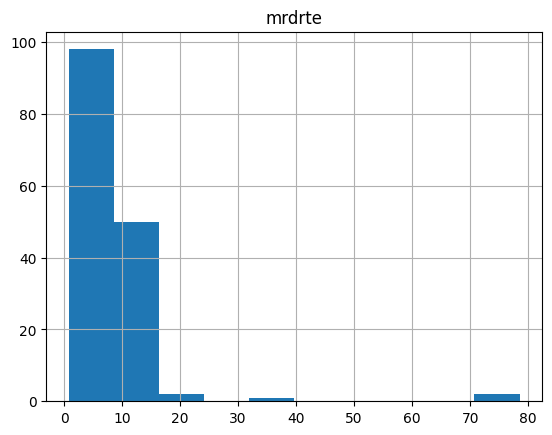

In [5]:
# Please write your executatble code here

# plots histogram of mrdrte variable
fig, ax = plt.subplots()
df.hist(column='mrdrte', ax=ax)

### Exercise 5: Perform a Univariate Regression Analysis (10 pts)

- Using `statsmodels` formula notation, perform a univariate regression analysis with `mrdrte`  as the dependent variable and `unem` as the independent variable.
- Print the summary of the regression model.

1. Write the Python code to fit this regression model

In [6]:
# Please write your executable code here

# fit regression mododel
results = smf.ols('mrdrte ~ unem', data=df).fit()

2. Output of the regression model summary.

In [7]:
# Write the code to print the results here

# print model results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 mrdrte   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     9.252
Date:                Thu, 10 Oct 2024   Prob (F-statistic):            0.00277
Time:                        14:29:04   Log-Likelihood:                -551.47
No. Observations:                 153   AIC:                             1107.
Df Residuals:                     151   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2200      2.681      0.082      0.9